<a href="https://colab.research.google.com/github/hubeidata/semaforo_nutricional/blob/Task_Tayra/entranamiento_de_platos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Ruta a los datos de entrenamiento y validación
train_data_path = '/content/drive/MyDrive/semaforo/platos_experimento1/train'
validation_data_path = '/content/drive/MyDrive/semaforo/platos_experimento1/validation'
model_path = '/content/drive/MyDrive/Models/food_classification_reducido1_model.h5'

# Preprocesamiento de datos y aumentación de imágenes
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Cargar el modelo existente o crear uno nuevo si no existe
if os.path.exists(model_path):
    print("Cargando modelo existente...")
    model = load_model(model_path)
    # Si se agregan nuevas clases, ajustar las últimas capas
    if model.layers[-1].units != train_generator.num_classes:
        x = model.layers[-4].output  # obtener la salida de la capa antes de Dense
        x = Dense(512, activation='relu')(x)
        x = Dropout(0.5)(x)
        output = Dense(train_generator.num_classes, activation='softmax')(x)
        model = Model(inputs=model.input, outputs=output)
        # Compilar el modelo con las nuevas capas
        model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
else:
    print("Creando un modelo nuevo...")
    # Cargar el modelo VGG16 preentrenado sin las capas superiores (fully connected layers)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Congelar las capas del modelo base
    for layer in base_model.layers:
        layer.trainable = False

    # Añadir nuevas capas superiores para nuestro problema específico
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(train_generator.num_classes, activation='softmax')(x)

    # Crear el modelo final
    model = Model(inputs=base_model.input, outputs=output)

    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Guardar el modelo entrenado
model.save(model_path)
print("Modelo almacenado en:", model_path)

Found 120 images belonging to 3 classes.
Found 40 images belonging to 3 classes.
Creando un modelo nuevo...
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
4/4 [==============================] - 49s 10s/step - loss: 1.6950 - accuracy: 0.3750 - val_loss: 1.2368 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 2s 566ms/step - loss: 1.3238 - accuracy: 0.4917 - val_loss: 0.8982 - val_accuracy: 0.5250
Epoch 3/10
4/4 [==============================] - 2s 554ms/step - loss: 0.8259 - accuracy: 0.6417 - val_loss: 0.8311 - val_accuracy: 0.7000
Epoch 4/10
4/4 [==============================] - 3s 669ms/step - loss: 0.5670 - accuracy: 0.7667 - val_loss: 0.6871 - val_accuracy: 0.7000
Epoch 5/10
4/4 [==============================] - 2s 553ms/step - loss: 0.5152 - accuracy: 0.7833 - val_loss: 0.6703 - val_accuracy: 0.7000
Epoch 6/10
4/4 [==============================] - 2s 589ms/step - loss: 0.3914 - accuracy: 0.8167 - val_loss: 0.5368 - val_accur

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Modelo almacenado en: /content/drive/MyDrive/Models/food_classification_reducido1_model.h5


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Ruta a los datos de entrenamiento y validación
train_data_path = '/content/drive/MyDrive/semaforo/comidas2_platos2/train'
validation_data_path = '/content/drive/MyDrive/semaforo/comidas2_platos2/validation'
model_path = '/content/drive/MyDrive/semaforo/Models/food20_classification_experimento_model.h5'

# Preprocesamiento de datos y aumentación de imágenes
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.1
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Cargar el modelo existente o crear uno nuevo si no existe
if os.path.exists(model_path):
    print("Cargando modelo existente...")
    model = load_model(model_path)
    # Si se agregan nuevas clases, ajustar las últimas capas
    if model.layers[-1].units != train_generator.num_classes:
        x = model.layers[-4].output  # obtener la salida de la capa antes de Dense
        x = Dense(512, activation='relu')(x)
        x = Dropout(0.5)(x)
        output = Dense(train_generator.num_classes, activation='softmax')(x)
        model = Model(inputs=model.input, outputs=output)
        # Compilar el modelo con las nuevas capas
        model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
else:
    print("Creando un modelo nuevo...")
    # Cargar el modelo VGG16 preentrenado sin las capas superiores (fully connected layers)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Congelar las capas del modelo base
    for layer in base_model.layers:
        layer.trainable = False

    # Añadir nuevas capas superiores para nuestro problema específico
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(train_generator.num_classes, activation='softmax')(x)

    # Crear el modelo final
    model = Model(inputs=base_model.input, outputs=output)

    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(
    train_generator,
    epochs=40,
    validation_data=validation_generator
)

# Guardar el modelo entrenado
model.save(model_path)
print("Modelo almacenado en:", model_path)

Found 4153 images belonging to 61 classes.
Found 666 images belonging to 61 classes.
Cargando modelo existente...
Epoch 1/40
130/130 [==============================] - 2805s 22s/step - loss: 4.1258 - accuracy: 0.0320 - val_loss: 4.0082 - val_accuracy: 0.0495
Epoch 2/40
130/130 [==============================] - 2758s 21s/step - loss: 3.9725 - accuracy: 0.0460 - val_loss: 3.9596 - val_accuracy: 0.0450
Epoch 3/40
130/130 [==============================] - 2768s 21s/step - loss: 3.8698 - accuracy: 0.0672 - val_loss: 3.8399 - val_accuracy: 0.0961
Epoch 4/40
130/130 [==============================] - 2754s 21s/step - loss: 3.7745 - accuracy: 0.0898 - val_loss: 3.7810 - val_accuracy: 0.1006
Epoch 5/40
130/130 [==============================] - 2744s 21s/step - loss: 3.6998 - accuracy: 0.0997 - val_loss: 3.6763 - val_accuracy: 0.1291
Epoch 6/40
130/130 [==============================] - 2737s 21s/step - loss: 3.6346 - accuracy: 0.1067 - val_loss: 3.6011 - val_accuracy: 0.1351
Epoch 7/40
130/1

comprobacion

1/1 [==============================] - 3s 3s/step


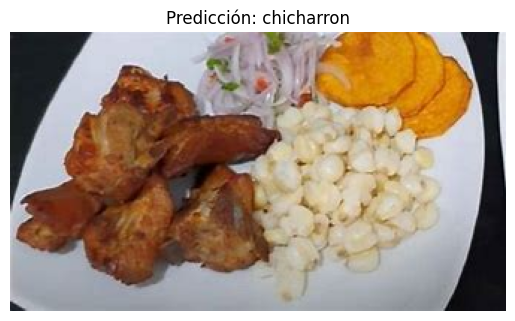

1/1 [==============================] - 0s 126ms/step


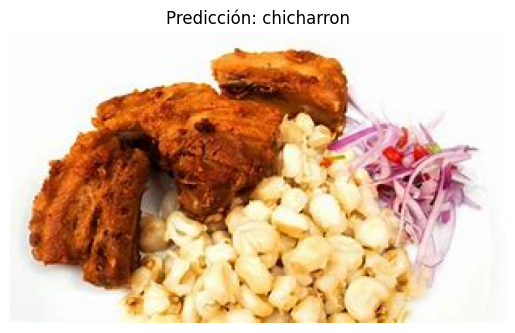

1/1 [==============================] - 0s 38ms/step


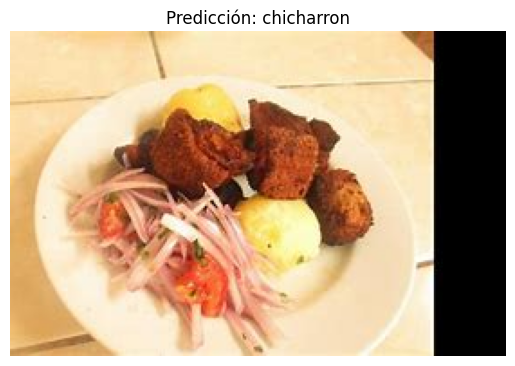

1/1 [==============================] - 0s 18ms/step


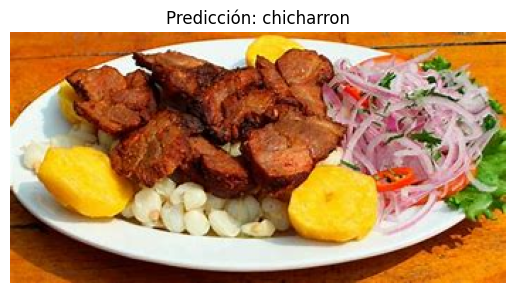

1/1 [==============================] - 0s 18ms/step


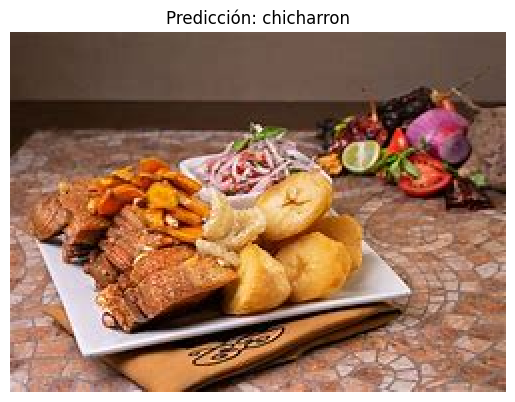

1/1 [==============================] - 0s 18ms/step


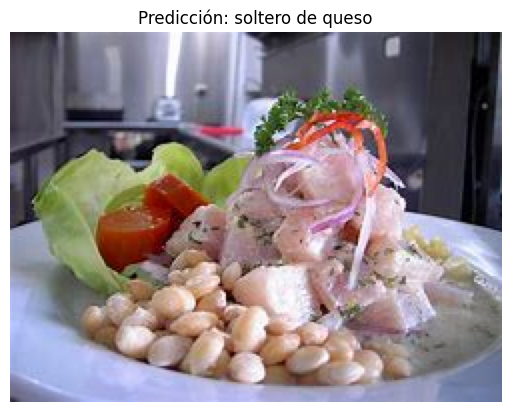

1/1 [==============================] - 0s 19ms/step


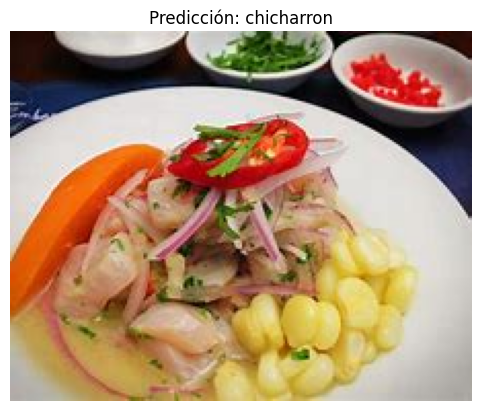

1/1 [==============================] - 0s 19ms/step


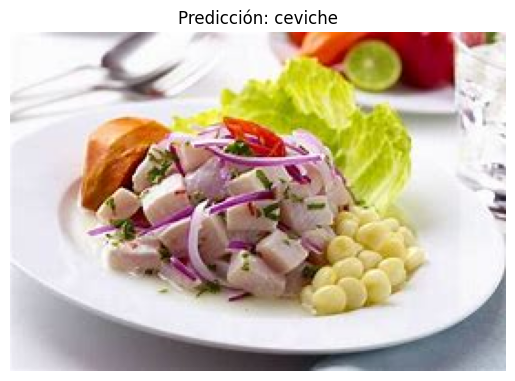

1/1 [==============================] - 0s 18ms/step


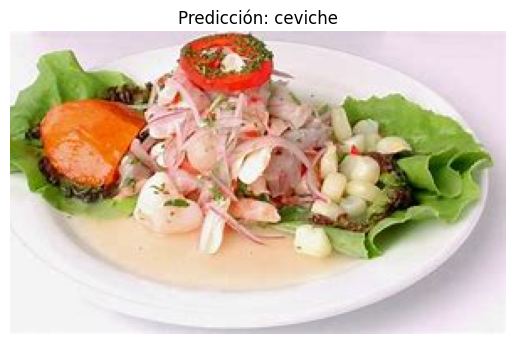

1/1 [==============================] - 0s 17ms/step


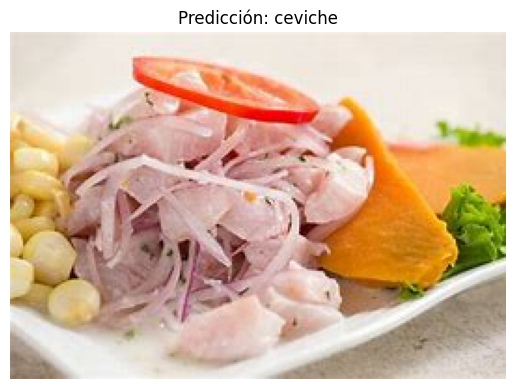

1/1 [==============================] - 0s 17ms/step


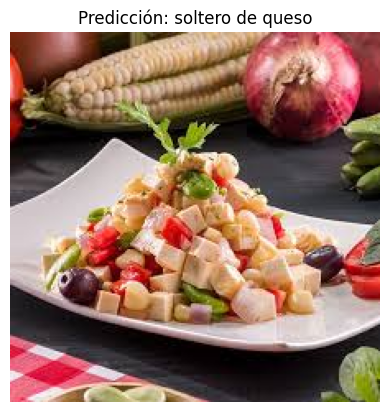

1/1 [==============================] - 0s 18ms/step


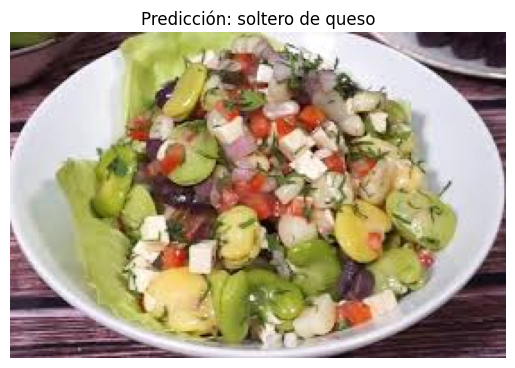

1/1 [==============================] - 0s 27ms/step


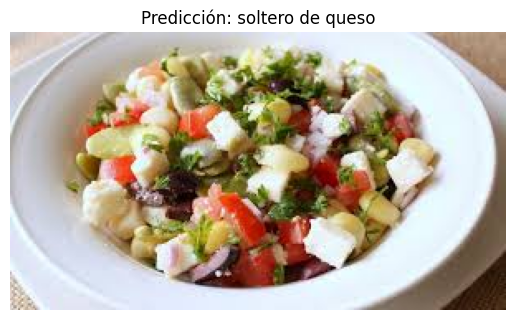

1/1 [==============================] - 0s 20ms/step


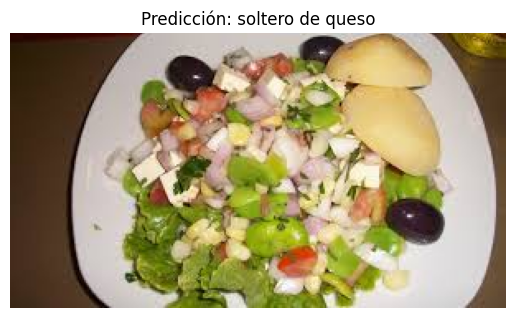

1/1 [==============================] - 0s 17ms/step


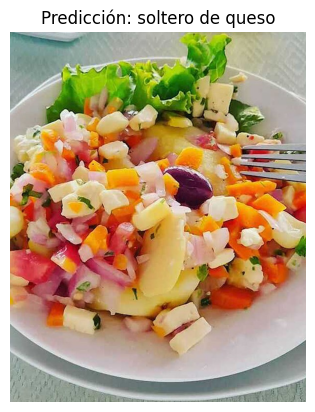

In [1]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

# Ruta al modelo entrenado y a la carpeta de predicciones
model_path = '/content/drive/MyDrive/semaforo/Models/food150_classification_experimento_model.h5'
prediction_folder ='/content/drive/MyDrive/semaforo/prediccion'
# Verifique si el prediction_folder existe
if not os.path.exists(prediction_folder):
    os.makedirs(prediction_folder)

# Cargar el modelo entrenado
model = load_model(model_path)

# Diccionario de clases (debes ajustar esto según tus clases)
class_indices = {'ceviche': 0, 'chicharron': 1, 'soltero de queso': 2}  # Ajusta según tus clases
class_labels = {v: k for k, v in class_indices.items()}  # Invertir el diccionario

# Función para preprocesar la imagen
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = image / 255.0  # Normalizar la imagen
    return image

# Leer y predecir cada imagen en la carpeta de predicciones
for file_name in os.listdir(prediction_folder):
    image_path = os.path.join(prediction_folder, file_name)
    image = preprocess_image(image_path)

    # Realizar la predicción
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = class_labels[predicted_class]

    # Mostrar la imagen con la etiqueta predicha
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"Predicción: {predicted_label}")
    plt.axis('off')
    plt.show()